# Introduction to Modern Mathematical Modeling
# Chapter 9; Visualizing Mathematical Models With Python

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import cartopy as ctp
import netCDF4 as nc

In [236]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}

plt.rcParams.update(**styledict)

In [237]:
time = np.arange(2001,2011)
Tmean = np.array([12.06, 11.78, 11.81, 11.72, 12.02,
                  12.36, 12.03, 11.27, 11.33, 11.66])
Prec = np.array([737.11, 737.87, 774.95, 844.55, 764.03,
                 757.43, 741.17, 793.50, 820.42, 796.80])

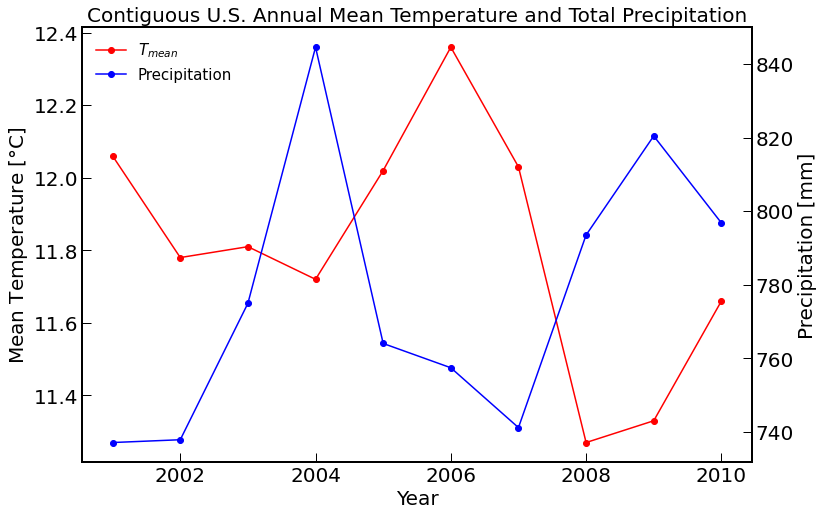

In [262]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))

ax.plot(time, Tmean, 'o-r', label="$T_{mean}$")
ax.set_ylabel("Mean Temperature [$\degree$C]")
ax.set_xlabel("Year")
ax.set_title("Contiguous U.S. Annual Mean Temperature and Total Precipitation", size=20)

ax1 = ax.twinx()

ax1.plot(time, Prec, 'o-b', label="Precipitation")
ax1.set_ylabel("Precipitation [mm]")

hand1, lab1 = ax.get_legend_handles_labels()
hand2, lab2 = ax1.get_legend_handles_labels()

ax.legend(handles=hand1+hand2, labels=lab1+lab2,
          loc='upper left');

ax1.tick_params(direction='in')
ax.tick_params(direction='in')

plt.savefig("CH9;ContiguousAnnualTemp.jpg", bbox_inches='tight')

In [239]:
x = 0.25*np.arange(-30, 31)

yPositive = np.where(np.sin(x) > 0)[0]
yNegative = np.where(np.sin(x) < 0)[0]


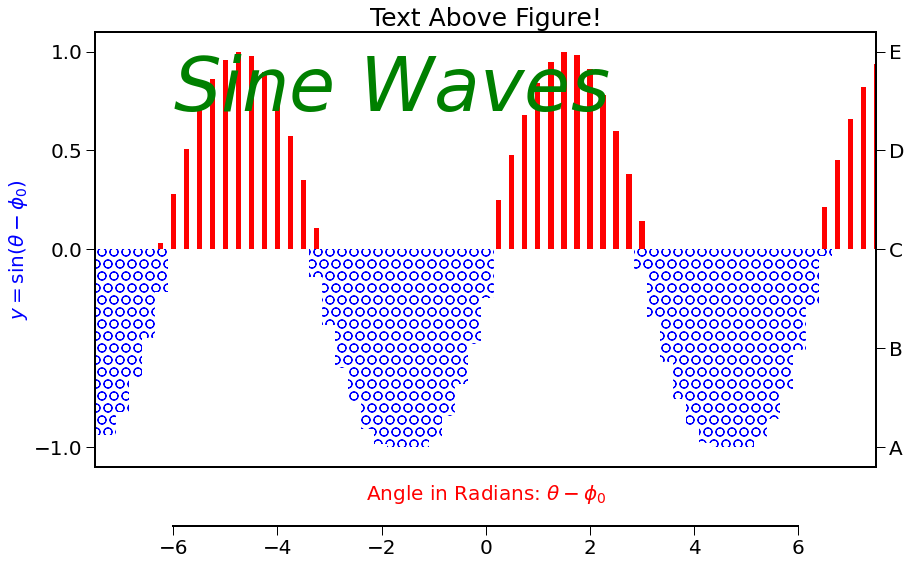

In [240]:
fig, ax = plt.subplots(figsize=(14,8))
plt.rcParams['hatch.color'] = 'blue'

ax.bar(x[yPositive], np.sin(x[yPositive]), width=.1, color='red')
ax.bar(x[yNegative], np.sin(x[yNegative]), hatch='O', fc='white')
ax.text(-6, .7, "$Sine\ Waves$", size=75, color='green')
ax.set_xlabel(r"Angle in Radians: $\theta - \phi_0$", color='red',
              labelpad=-75)
ax.set_xticks([2*i for i in range(-3, 4)])
ax.set_xlim(x.min(), x.max())
ax.set_ylabel(r"$y = \sin(\theta - \phi_0)$", color='blue')
ax.set_yticks([-1., 0., .5, 1.])
ax.spines['bottom'].set_position(('data',-1.4))
ax.spines['bottom'].set_bounds(-6,6)

ax1 = ax.twinx()
ax1.plot(x, np.sin(x), alpha=0)
ax1.set_yticks([-1., -.5, 0., .5, 1.])
ax1.set_yticklabels(['A', 'B', 'C', 'D', 'E'])
ax1.tick_params(width=1, length=9)
ax1.set_title("Text Above Figure!", size=25)


fig.savefig("CH9;PlotFunDemo.jpg", bbox_inches='tight')

In [241]:
randVals = np.random.standard_normal(200)


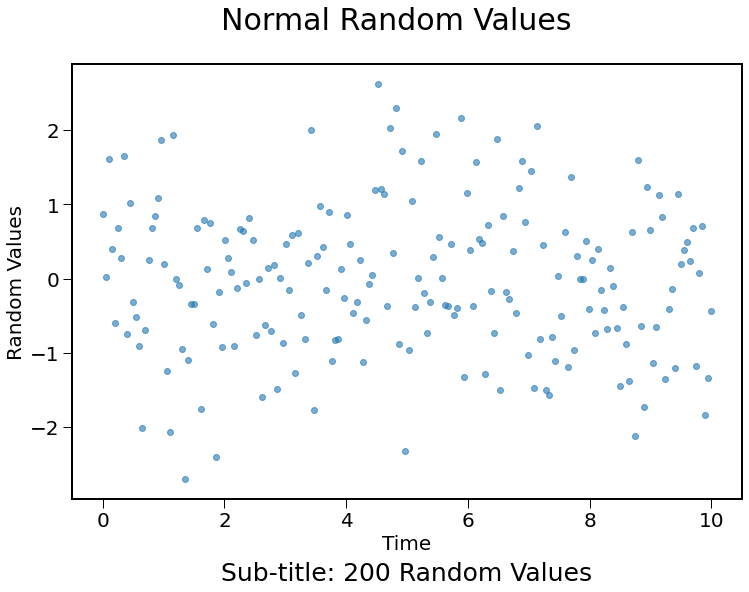

In [242]:
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Normal Random Values", size=30)

ax.scatter(np.linspace(0, 10, randVals.size), randVals, alpha=.6)
ax.set_title("Sub-title: 200 Random Values", y=-.2)
ax.set_ylabel("Random Values")
ax.set_yticks([i for i in range(-2, 3)])
ax.set_xlabel("Time")


fig.savefig("CH9;200Randoms.jpg", bbox_inches='tight')

In [243]:
NOAAdat = pd.read_csv("NOAAAverageAnnualMeanTemperatureAnomalies.txt",
                      sep="\s+", header=None)

In [244]:
years = np.array(NOAAdat.iloc[:139,0])
anom = np.array(NOAAdat.iloc[:139,1])

fiveYearAve = np.array([np.mean(anom[i-2:i+3]) for i in range(2,anom.size-2)])
fiveYearAve = np.append([np.nan,np.nan], np.append(fiveYearAve,[np.nan,np.nan], axis=0), axis=0)

blueHere = np.where(fiveYearAve < 0)[0]
redHere = np.where(fiveYearAve >= 0)[0]

NOAAdat

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  


,0,1,2,3,4,5
0,1880,-0.370221,0.009780,0.001438,0.000850,0.007492
1,1881,-0.319993,0.009813,0.001438,0.000877,0.007498
2,1882,-0.320088,0.009803,0.001438,0.000897,0.007468
3,1883,-0.396044,0.009790,0.001438,0.000910,0.007443
4,1884,-0.458355,0.009756,0.001438,0.000922,0.007395
...,...,...,...,...,...,...
135,2015,0.660687,0.005950,0.000232,0.000002,0.005715
136,2016,0.701143,0.005950,0.000232,0.000002,0.005715
137,2017,0.603652,0.005950,0.000232,0.000002,0.005715
138,2018,0.537254,0.005950,0.000232,0.000002,0.005715


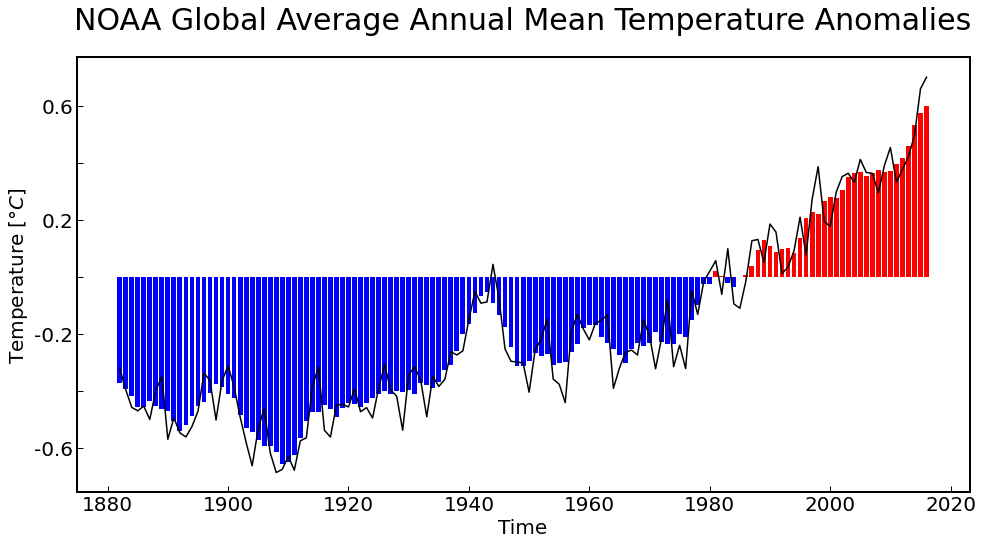

In [245]:
fig, ax = plt.subplots(1, figsize=(16,8))

ax.plot(years[2:-2], anom[2:-2], '-k')
ax.bar(years[blueHere], fiveYearAve[blueHere], color='blue')
ax.bar(years[redHere], fiveYearAve[redHere], color='red')
ax.set_title("NOAA Global Average Annual Mean Temperature Anomalies",
             size=plt.rcParams['axes.titlesize']+5, y=1.05)
ax.set_yticks(np.linspace(-.6, .6, 7))
ax.set_yticklabels([-.6, None, -.2, None, .2, None, .6])
ax.tick_params(direction='in', length=6)
ax.set_ylabel("Temperature $[\degree C]$")
ax.set_xlabel("Time")

fig.savefig("CH9;NOAA_GAAMTA.jpg", bbox_inches='tight')

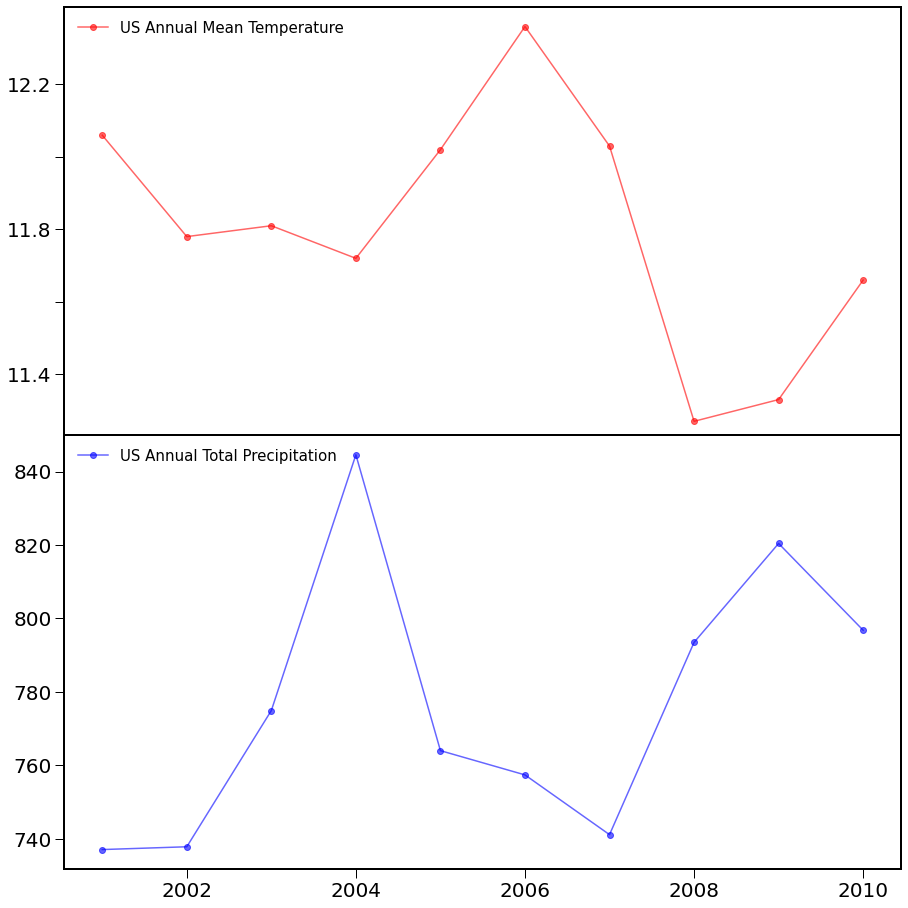

In [246]:
fig, ax = plt.subplots(2,1, figsize=(12,12))

ax[0].axes.get_xaxis().set_visible(False)
ax[0].plot(time, Tmean, 'ro-', alpha=.6, label="US Annual Mean Temperature")
ax[0].legend(loc='upper left')
ax[0].set_yticks([11.4, np.mean([11.4, 11.8]), 11.8, np.mean([11.8, 12.2]), 12.2])
ax[0].set_yticklabels([11.4, None, 11.8, None, 12.2])

ax[1].plot(time, Prec, 'bo-', alpha=.6, label="US Annual Total Precipitation")
ax[1].legend(loc='upper left')

fig.tight_layout(pad=-1.5)
fig.savefig("CH9;MeanTemp&Precipitation.jpg", bbox_inches='tight')


In [247]:
x, y = np.linspace(-1, 1, 25), np.linspace(-1, 1, 25)
z = np.random.standard_normal(size=(25,25))

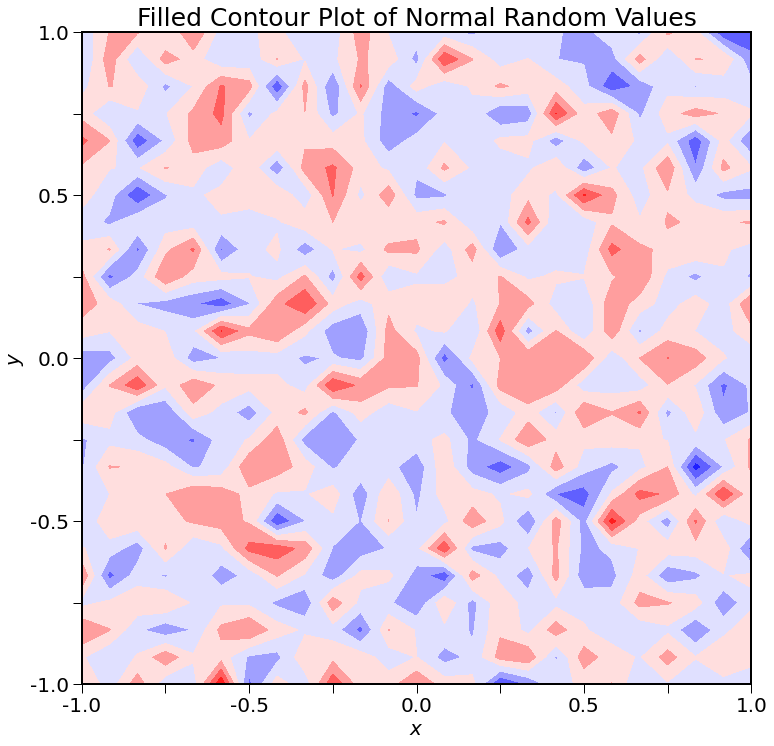

In [248]:
fig, ax = plt.subplots(1,figsize=(12,12))

ax.contourf(x,y,z, cmap=cm.get_cmap('bwr'))
ticklabs = [-1., None, -.5, None, 0., None, .5, None, 1.]
ax.set_yticklabels(ticklabs)
ax.set_xticklabels(ticklabs)

ax.set_ylabel("$y$")
ax.set_xlabel("$x$")

ax.set_title("Filled Contour Plot of Normal Random Values")

fig.savefig("CH9;ContfNormalRandomVals.jpg", bbox_inches='tight')

In [249]:
lat = np.linspace(-90, 90, 37)
lon = np.linspace(0, 360, 72)
mapmat = np.random.standard_normal(size=(lat.size, lon.size))

levels = np.linspace(-3, 3, 81)

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


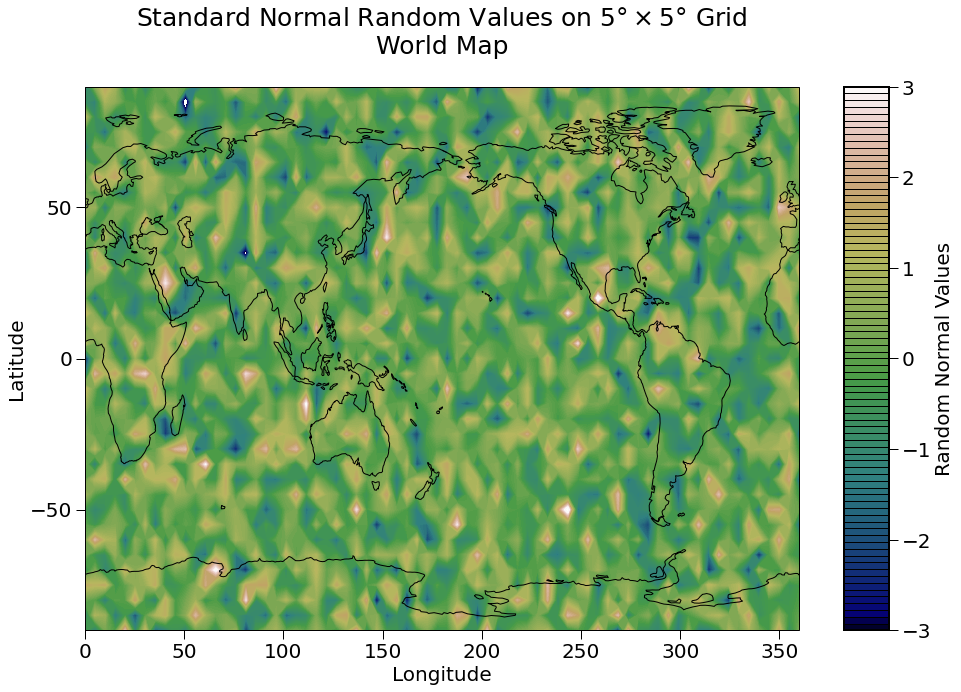

In [260]:
fig, ax = plt.subplots(figsize=(16, 10))

ax = plt.subplot(1,1,1, projection=ctp.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_global()
ax.set_title(r"Standard Normal Random Values on $5\degree \times 5\degree$ Grid"
             "\nWorld Map",
             y=1.05)

contf = ax.contourf(lon-180, lat, mapmat, levels, cmap=cm.get_cmap('gist_earth'))
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([i for i in range(-3, 4)])
colbar.set_label("Random Normal Values")
ax.set_aspect('auto')

ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350],crs=ctp.crs.PlateCarree())
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax.set_xlabel("Longitude")

ax.set_yticks([-50, 0, 50], crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

fig.savefig("CH9;RandomValsonWorldMap.jpg", bbox_inches='tight');

In [251]:
NAlat = np.linspace(10, 70, 13)
NAlon = np.linspace(230, 295, 14)
NAmat = np.random.standard_normal(size=(NAlat.size,NAlon.size))

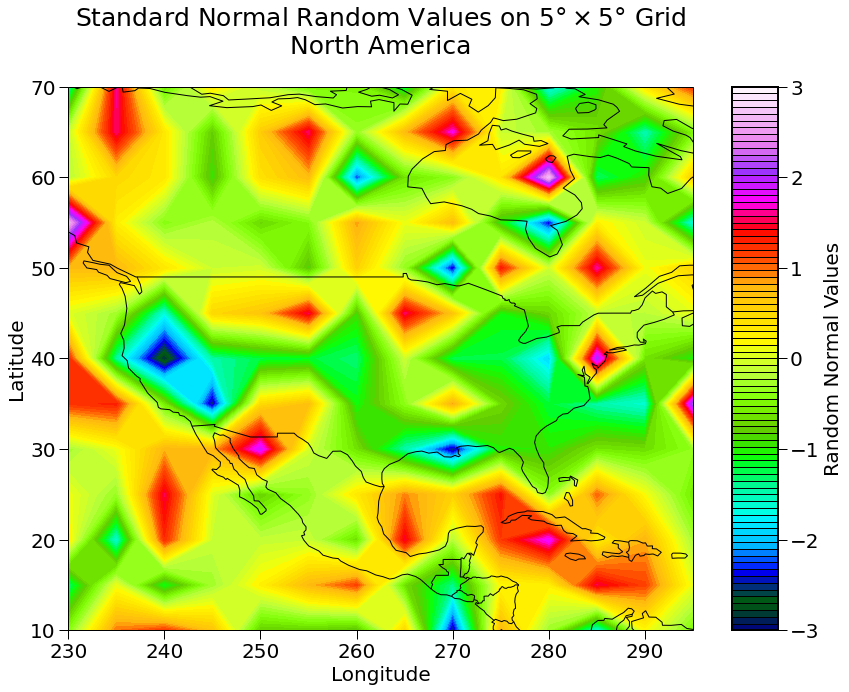

In [252]:
fig, ax = plt.subplots(figsize=(14,10))

ax = plt.subplot(111, projection=ctp.crs.PlateCarree())
ax.set_extent([230, 295, 10, 65])
ax.coastlines()
ax.add_feature(ctp.feature.BORDERS)
ax.set_title(r"Standard Normal Random Values on $5\degree \times 5\degree$ Grid"
             "\nNorth America",
             y=1.05)

contf = ax.contourf(NAlon, NAlat, NAmat, levels, cmap=cm.get_cmap('gist_ncar'))
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_label("Random Normal Values")
colbar.set_ticks([i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_yticks([10*i for i in range(1, 8)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([10*i for i in range(-13, -6)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([10*i for i in range(23,30)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9)

fig.savefig("CH9;RandomValsonNorthAmerca.jpg", bbox_inches='tight');

In [253]:
datamat = nc.Dataset("air.mon.mean.nc")
datamat

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    References: http://www.esrl.noaa.gov/psd/dat

In [254]:
Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']
type(Lon)

numpy.ma.core.MaskedArray

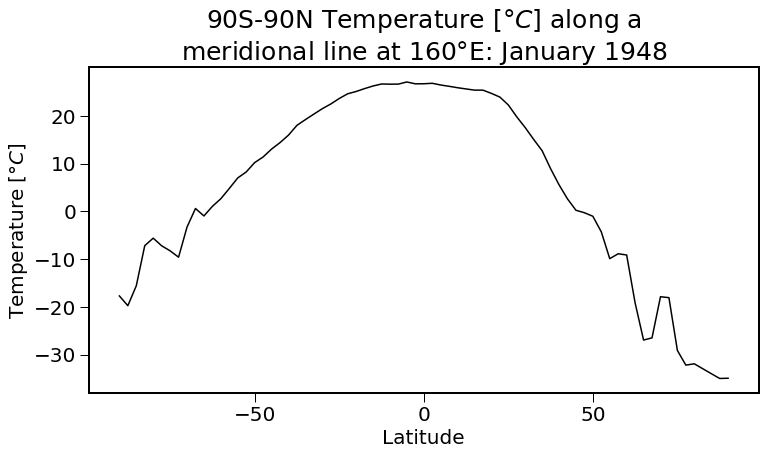

In [255]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(np.linspace(90, -90, precnc.shape[1]), precnc[0, :, 64], '-k')
ax.set_ylabel("Temperature $[\degree C]$")
ax.set_yticks([10*i for i in range(-3, 3)])
ax.set_xlabel("Latitude")
ax.set_xticks([-50, 0, 50])
ax.set_title("90S-90N Temperature [$\degree C$] along a\n"
             "meridional line at 160$\degree$E: January 1948")
ax.tick_params(length=9, width=1)

fig.savefig("CH9;MeridionalTemp.jpg", bbox_inches='tight');

In [256]:
JanMons = precnc[12*np.arange(68)]
sdmat = np.std(precnc, axis=0)
climmat = np.mean(JanMons, axis=0)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


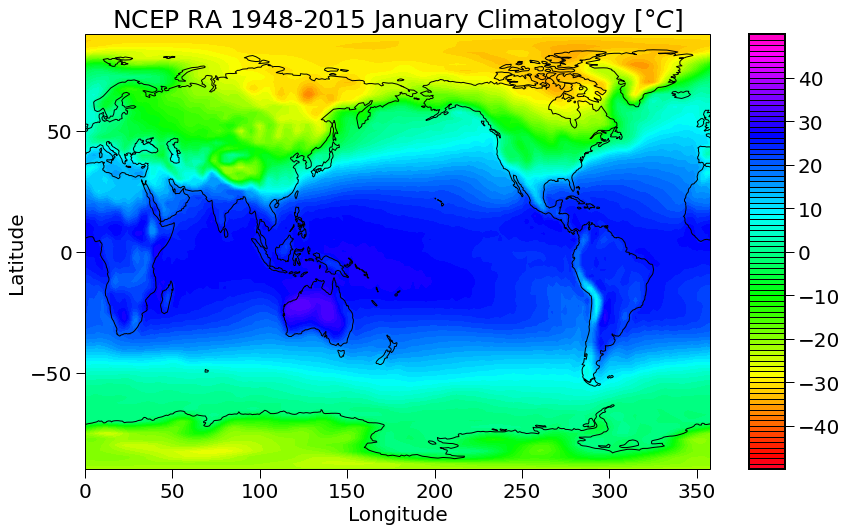

In [257]:
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=ctp.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("NCEP RA 1948-2015 January Climatology [$\degree C$]")

contf = ax.contourf(Lon-180, Lat, climmat, levels1, cmap=cm.get_cmap('gist_rainbow'))
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([10*i for i in range(-4, 5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

fig.savefig("CH9;JanuaryClimatology.jpg", bbox_inches='tight');

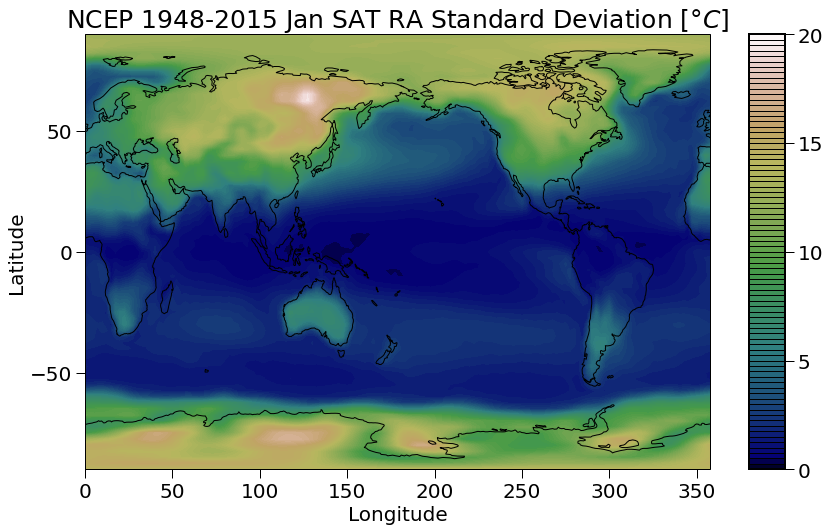

In [258]:
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=ctp.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("NCEP 1948-2015 Jan SAT RA Standard Deviation [$\degree C$]")

contf = ax.contourf(Lon-180, Lat, sdmat, levels2, cmap=cm.get_cmap('gist_earth'))
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([5*i for i in range(5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

fig.savefig("CH9;JanuarySTD.jpg", bbox_inches='tight');